# Import Library

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import plotly.graph_objs as go 
import plotly as py
from sklearn.preprocessing import MinMaxScaler

In [201]:
#Models import
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#import imputer:
from sklearn.impute import KNNImputer
from imblearn import under_sampling, over_sampling
#score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score

# Data Pre Precessing

In [100]:
#Read dataset
df = pd.read_csv('/content/startup-data.csv')

In [101]:
#Print dataset
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [102]:
#Rows & Columns
df.shape

(923, 49)

In [103]:
print('Numer of Columns: ', df.shape[1])
print('Numer of Rows: ', df.shape[0])

Numer of Columns:  49
Numer of Rows:  923


In [104]:
print(df.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


In [105]:
df.columns.tolist()

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [107]:
for i in df.columns:
    unique_vals = df[i].unique()
    print("Number of unique values for the feature ",i," is ", len(unique_vals))

Number of unique values for the feature  Unnamed: 0  is  923
Number of unique values for the feature  state_code  is  35
Number of unique values for the feature  latitude  is  652
Number of unique values for the feature  longitude  is  651
Number of unique values for the feature  zip_code  is  382
Number of unique values for the feature  id  is  922
Number of unique values for the feature  city  is  221
Number of unique values for the feature  Unnamed: 6  is  253
Number of unique values for the feature  name  is  922
Number of unique values for the feature  labels  is  2
Number of unique values for the feature  founded_at  is  217
Number of unique values for the feature  closed_at  is  203
Number of unique values for the feature  first_funding_at  is  585
Number of unique values for the feature  last_funding_at  is  680
Number of unique values for the feature  age_first_funding_year  is  634
Number of unique values for the feature  age_last_funding_year  is  756
Number of unique values

In [108]:
df.drop_duplicates()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [109]:
df.size

45227

In [110]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0                            1153
state_code                              WV
latitude                         59.335232
longitude                        18.057121
zip_code                    Maryland 21045
id                                   c:997
city                               Zeeland
name                                 xkoto
labels                                   1
founded_at                        9/9/2010
first_funding_at                  9/9/2009
last_funding_at                   9/9/2011
age_first_funding_year             21.8959
age_last_funding_year              21.8959
age_first_milestone_year           24.6849
age_last_milestone_year            24.6849
relationships                           63
funding_rounds                          10
funding_total_usd               5700000000
milestones                               8
is_CA                                    1
is_NY                                    1
is_MA                                    1
is_TX      

In [111]:
df.columns.tolist()

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [112]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='RdYlGn',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [113]:
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(5)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,acquired
1,NaN,NaN,7.0055,7.0055,CA,acquired
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,acquired
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,acquired
4,San Francisco CA 94105,10/1/2012,0.0384,0.0384,CA,closed


In [114]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [115]:
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Column "Unnamed: 6": ', totalNull)

Total Missing Values Column "Unnamed: 6":  0


In [116]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [117]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                    0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [118]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [119]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Column "closed_at": ', totalNull)

Total Missing Values Column "closed_at":  0


In [120]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [121]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [122]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='Set3_r',low =0.2,high=0.1) 

,Null Values,% Missing Values
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039


In [123]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)

In [124]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


# Graphic Approach


In [125]:
df.corr()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.130166,-0.123438,-0.079950,-0.118456,...,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.041030,-0.017674,-0.039198,-0.000659,...,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.054850,-0.083744,-0.073197,0.022447,...,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.250163,0.358600,0.360434,0.206049,...,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.382395,0.236958,-0.187817,-0.155478,...,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.529763,0.436369,0.073080,0.385999,...,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.130166,-0.041030,-0.054850,0.250163,0.382395,0.529763,1.000000,0.813272,0.310615,0.203653,...,0.037784,-0.016923,0.071394,-0.198481,0.073806,0.195873,0.168593,0.224239,0.052237,0.168606
age_last_milestone_year,-0.123438,-0.017674,-0.083744,0.358600,0.236958,0.436369,0.813272,1.000000,0.411711,0.257549,...,0.019947,-0.059105,0.042486,-0.142864,0.170414,0.251696,0.208067,0.211145,0.072443,0.212903
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.310615,0.411711,1.000000,0.358883,...,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.203653,0.257549,0.358883,1.000000,...,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345


In [126]:
features = ['relationships','milestones','is_top500','age_last_milestone_year','funding_rounds','has_roundB','has_roundA','avg_participants','has_roundC','age_first_milestone_year','has_roundD', 'has_angel', 'is_otherstate']



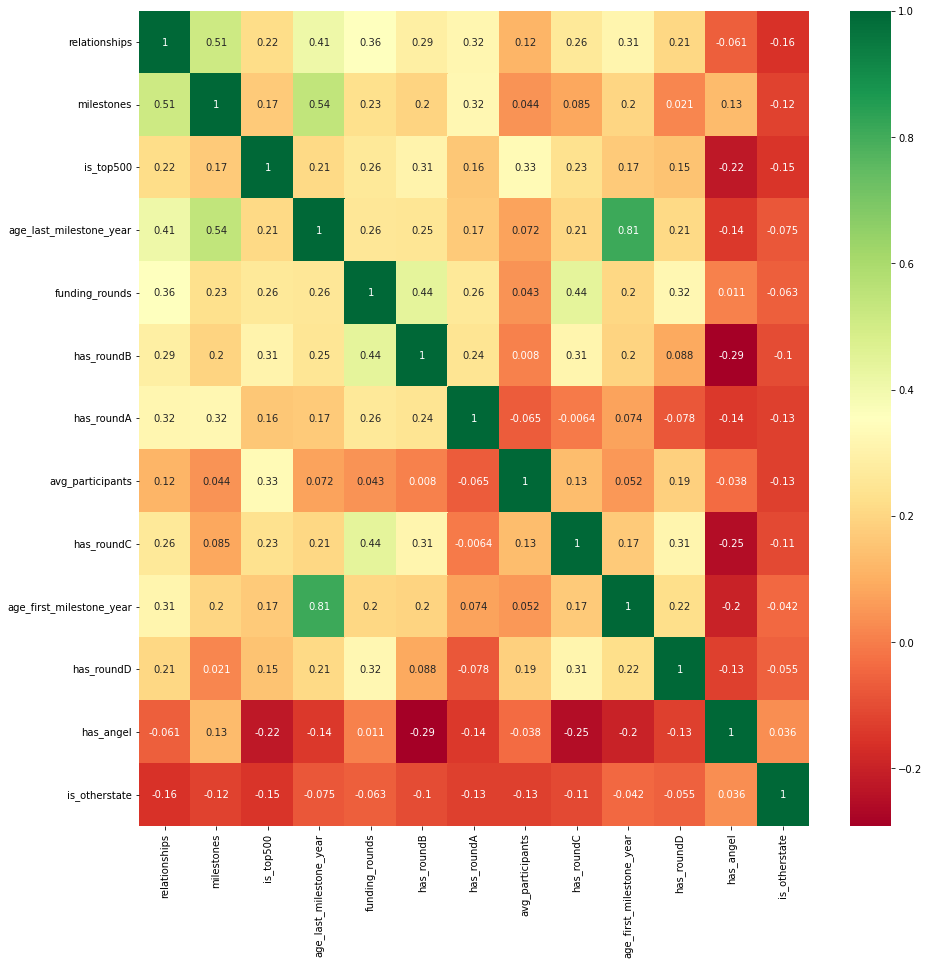

In [127]:
plt.figure(figsize = (15,15))
sns.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdYlGn)
plt.show()

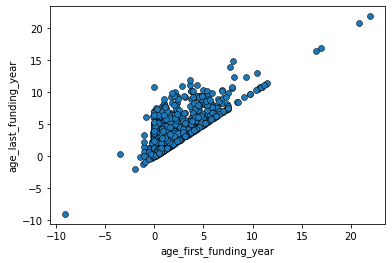

In [128]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

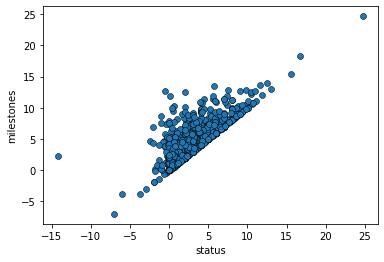

In [129]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_milestone_year'], y=df['age_last_milestone_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

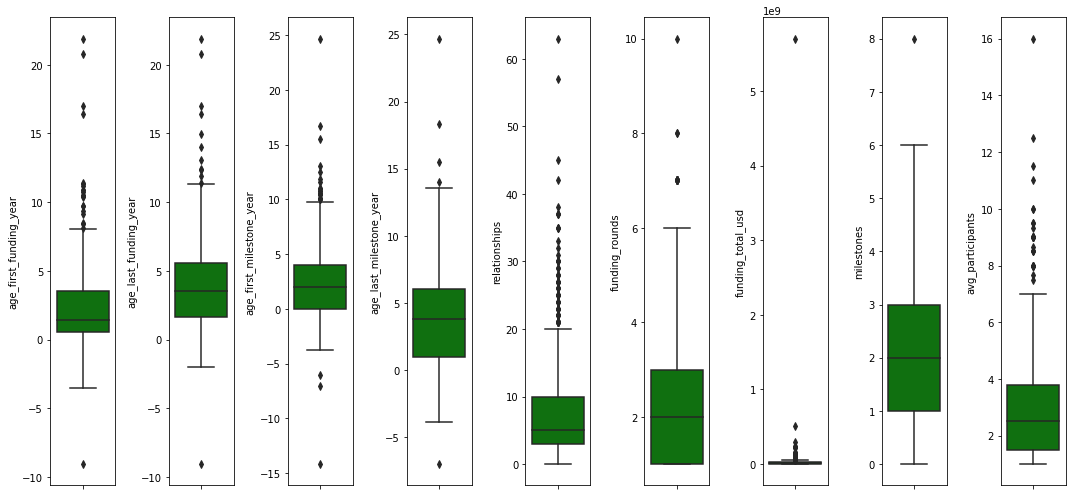

In [130]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

# Add New Feature


In [131]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])

In [132]:
df['last_date']=df['closed_at'] #copy data
df['last_date']=df['last_date'].fillna('2013-12-31')
df['last_date']=pd.to_datetime(df['last_date'])

In [133]:
df["founded_at"] = pd.to_datetime(df["founded_at"])
df["age"] = (df["last_date"]-df["founded_at"])
df["age"]=round(df.age/np.timedelta64(1,'Y'))

In [134]:
df[[ 'age', 'age_first_funding_year','age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year']].sort_values('age').head()

,age,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
88,-8.0,0.8822,0.8822,0.0000,0.0000
558,-4.0,-9.0466,-9.0466,-6.0466,-3.8822
73,-2.0,1.6685,9.3370,7.3808,10.4740
350,0.0,0.3288,0.3288,-0.4192,-0.4192
690,0.0,0.0000,0.6904,0.0000,0.6904


In [135]:
df.age.values

array([ 7., 14.,  5., 12.,  2.,  7.,  9., 10., 12.,  9., 13.,  6.,  8.,
        6., 13., 11., 10., 14.,  4.,  5., 13.,  8.,  7.,  6.,  3., 12.,
       11.,  6.,  7.,  9.,  6., 13.,  5.,  3.,  3.,  4.,  4.,  8.,  5.,
        8.,  8.,  2.,  3., 10., 12., 11.,  4.,  4.,  4., 11.,  8.,  5.,
        9., 14.,  8.,  5.,  8.,  9.,  7., 14., 12.,  7., 13., 12.,  5.,
        8., 12.,  8., 14.,  8.,  6.,  2.,  8., -2.,  2.,  5., 13.,  4.,
        8.,  5.,  3.,  5.,  6., 12.,  9.,  9.,  8., 12., -8., 11., 12.,
        5.,  7.,  3.,  8.,  9.,  8.,  5.,  6.,  6., 24., 14.,  9., 10.,
        4.,  6., 14.,  2.,  7.,  6.,  7., 11., 10.,  8.,  3.,  4., 16.,
       11.,  9.,  4.,  2.,  8.,  4.,  4.,  6.,  8., 14.,  4.,  5., 10.,
       14.,  2.,  7., 14.,  2., 13.,  6., 10.,  7.,  9.,  7.,  9.,  5.,
        8.,  4.,  7.,  5., 12.,  4., 12.,  9.,  3.,  3.,  9., 12.,  4.,
        8.,  7.,  5.,  3., 12.,  4.,  7., 10.,  4.,  8.,  5.,  1.,  5.,
        6.,  7.,  5.,  3.,  9.,  8.,  2.,  3.,  3.,  4.,  5., 11

In [136]:
df=df.drop(df[df.age<0].index)

In [137]:
df=df.drop(df[df.age_first_funding_year<0].index)

In [138]:
df=df.drop(df[df.age_last_funding_year<0].index)

In [139]:
df=df.drop(df[df.age_first_milestone_year<0].index)

In [140]:
df=df.drop(df[df.age_last_milestone_year<0].index)

In [141]:
df.shape

(838, 50)

In [142]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,0,0,0,0,1.0000,1,closed,2012-10-01,2.0


In [143]:
df.age.values

array([ 7., 14.,  5., 12.,  2.,  7.,  9., 10., 12.,  9., 13.,  8.,  6.,
       13., 11., 10.,  4.,  5., 13.,  8.,  7.,  3., 12., 11.,  6.,  7.,
        9.,  6., 13.,  3.,  3.,  4.,  4.,  8.,  5.,  8.,  8.,  2.,  3.,
       10., 12., 11.,  4.,  4.,  4., 11.,  8.,  5.,  9., 14.,  8.,  5.,
        8.,  9.,  7., 14.,  7., 13., 12.,  5.,  8., 12.,  8., 14.,  8.,
        6.,  8.,  2.,  5., 13.,  4.,  8.,  5.,  6., 12.,  9.,  9.,  8.,
       12., 11., 12.,  5.,  7.,  3.,  8.,  9.,  8.,  5.,  6.,  6., 24.,
       14.,  9., 10.,  6., 14.,  2.,  7.,  6.,  7., 11., 10.,  8.,  3.,
        4., 16., 11.,  9.,  4.,  2.,  8.,  6.,  8., 14., 10., 14.,  2.,
       14.,  2., 13.,  6., 10.,  7.,  9.,  7.,  9.,  5.,  8.,  4.,  7.,
        5., 12.,  4., 12.,  9.,  3.,  3.,  9., 12.,  4.,  8.,  7.,  5.,
        3., 12.,  4.,  7., 10.,  4.,  8.,  5.,  1.,  5.,  6.,  7.,  5.,
        3.,  9.,  8.,  2.,  3.,  3.,  4.,  5., 11.,  6., 12., 10.,  2.,
       11.,  5., 12., 10.,  3., 14.,  7., 10.,  9.,  6., 10., 13

In [144]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,0,0,0,0,1.0000,1,closed,2012-10-01,2.0


In [145]:
df.shape

(838, 50)

In [146]:
features = ['age_first_funding_year', 'relationships','funding_total_usd',
            'age_last_funding_year','age_first_milestone_year', 
            'age_last_milestone_year', 'funding_rounds', 
            'milestones','avg_participants', 'age']
df[features].skew(axis=0, skipna=True)>2

age_first_funding_year       True
relationships                True
funding_total_usd            True
age_last_funding_year       False
age_first_milestone_year    False
age_last_milestone_year     False
funding_rounds              False
milestones                  False
avg_participants            False
age                         False
dtype: bool

In [147]:
norm = ['age_first_funding_year', 'relationships', 'funding_total_usd']

for var in norm:
    df['norm_'+var]=MinMaxScaler().fit_transform(df[var].values.reshape(len(df),1)) # norm_age_first_funding_year 

In [148]:
df.shape

(838, 53)

# Data Visualization

In [149]:
data_grp_3=df[df['labels']==1].groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_3.columns=['age','total_succes']

data_grp_4=df.groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_4.columns=['age','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                           on='age')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3

,age,total_succes,total,succes_rate
0,2.0,8,38,21.05
1,3.0,16,53,30.19
2,4.0,36,68,52.94
3,5.0,51,83,61.45
4,6.0,59,83,71.08
5,7.0,54,85,63.53
6,8.0,56,73,76.71
7,9.0,66,85,77.65
8,10.0,41,53,77.36
9,11.0,43,52,82.69


<function matplotlib.pyplot.tight_layout>

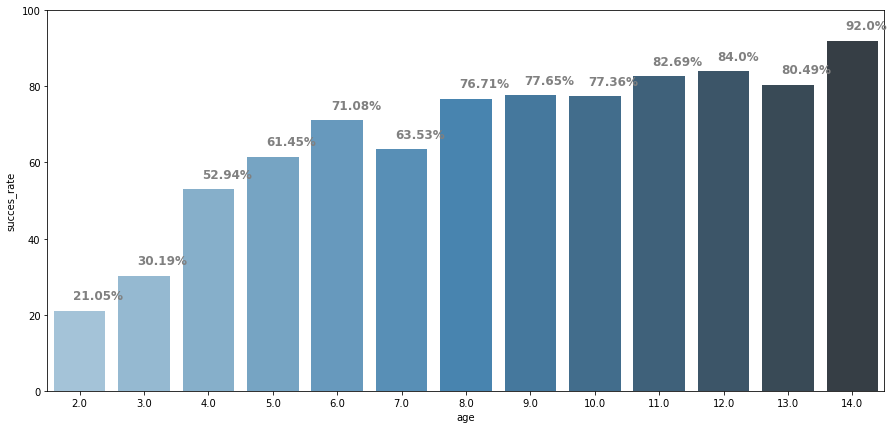

In [150]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'age',y='succes_rate',data=data_grp_3,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_3))
y = data_grp_3['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.tight_layout

In [151]:
data_grp_5=df[df['labels']==1].groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_5.columns=['milestones','total_succes']

data_grp_6=df.groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_6.columns=['milestones','total']

data_grp_5=data_grp_5.merge(data_grp_6,
                           on='milestones')
data_grp_5['succes_rate']=round((data_grp_5['total_succes']/data_grp_5['total'])*100,2)

data_grp_5

,milestones,total_succes,total,succes_rate
0,0,46,143,32.17
1,1,140,230,60.87
2,2,161,218,73.85
3,3,135,164,82.32
4,4,43,54,79.63
5,5,22,24,91.67
6,6,3,4,75.00
7,8,1,1,100.00


<function matplotlib.pyplot.tight_layout>

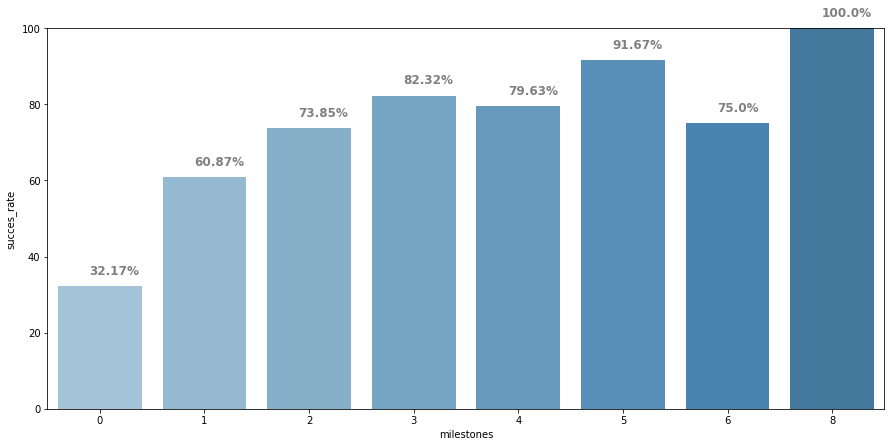

In [152]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'milestones',y='succes_rate',data=data_grp_5,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_5))
y = data_grp_5['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

In [153]:
#How many Startup are acquired?
df_acquired = df[(df["labels"] == 1)]
df_acquired.shape

(551, 53)

In [154]:
#How many Startup are closed?
df_closed = df[(df["labels"] == 0)]
df_closed.shape

(287, 53)

In [155]:
df.shape

(838, 53)

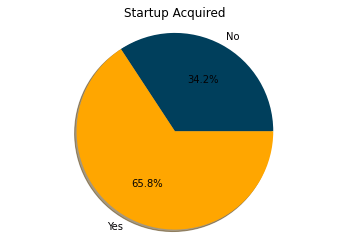

In [156]:
value_counts = df["labels"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%1.1f%%',
           colors=['#003f5c', '#ffa600'], shadow=True, startangle=0, textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

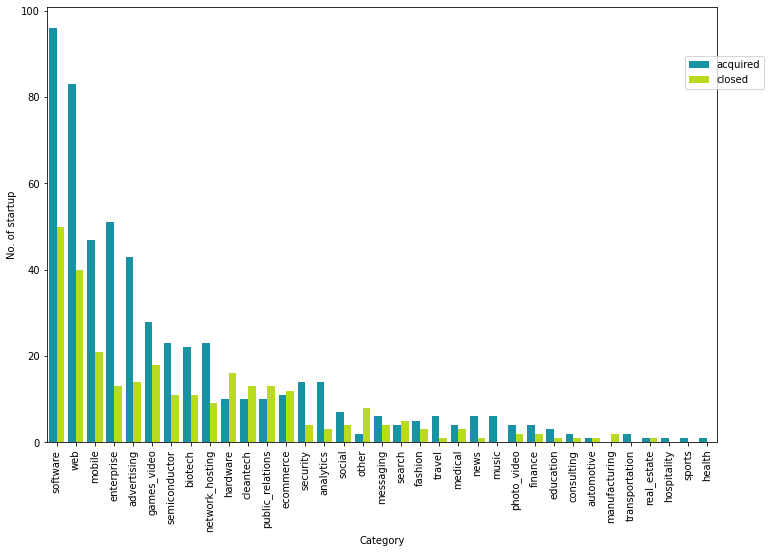

In [157]:
#Which category has the largest number of startup
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [158]:
#Which category has the largest number Success Rate?
data1 = df[df['labels']==1].groupby(['category_code']).agg({'labels':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['labels']==0].groupby(['category_code']).agg({'labels':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'labels':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,6,1,7,85.71
17,news,6,1,7,85.71
1,analytics,14,3,17,82.35
8,enterprise,51,13,64,79.69
23,security,14,4,18,77.78
0,advertising,43,14,57,75.44
7,education,3,1,4,75.00
16,network_hosting,23,9,32,71.88
15,mobile,47,21,68,69.12
24,semiconductor,23,11,34,67.65


In [159]:
#Which category having most number of total funding
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7176623599
30,software,2584384065
3,biotech,1704689813
34,web,1595787702
8,enterprise,1307185096
4,cleantech,1300284730
28,semiconductor,1095156970
0,advertising,831144012
11,games_video,784548530
12,hardware,753718873


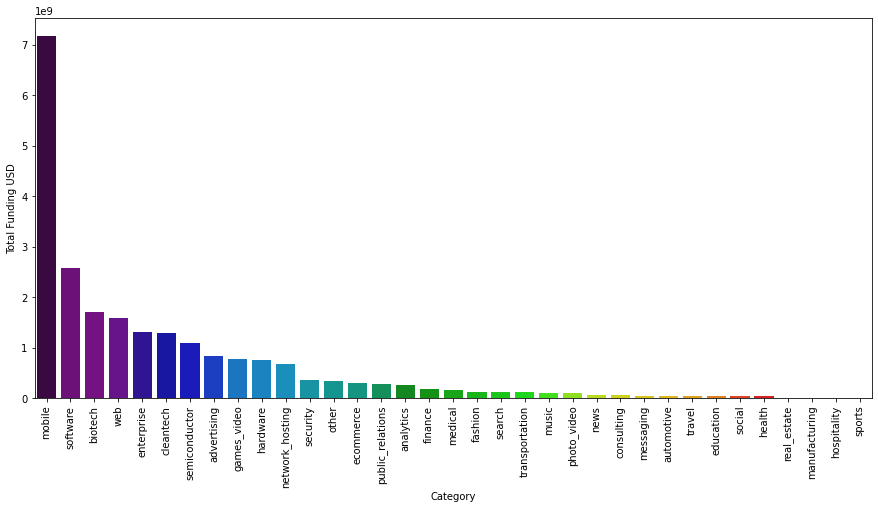

In [160]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

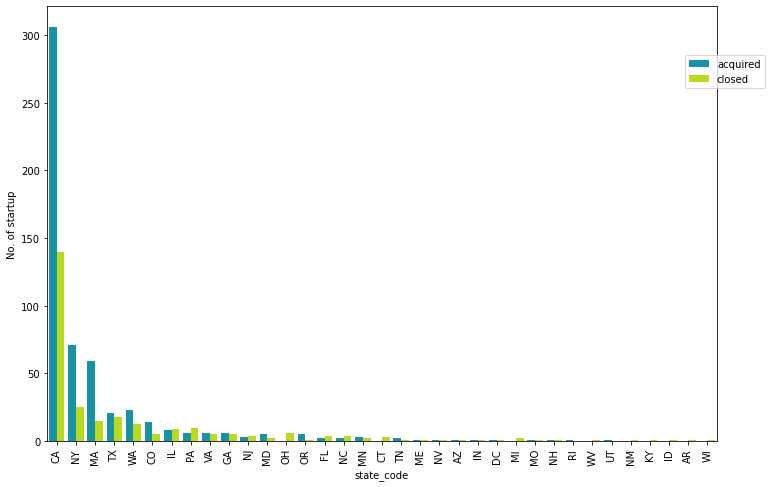

In [161]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [162]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,446
23,NY,96
12,MA,74
29,TX,39
32,WA,36
3,CO,19
9,IL,17
26,PA,16
31,VA,11
7,GA,11


In [163]:
#Which State having most number of acquired Startup per category
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
26,CA,software,50
67,MA,software,15
105,NY,web,12
135,WA,mobile,5
49,IL,software,4
128,TX,web,4
121,TX,enterprise,4
36,CO,software,4
131,VA,software,2
130,VA,mobile,2


In [164]:
#Which State having most number of closed Startup per category
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

,state_code,category_code,num_startup
27,CA,web,21
59,MA,software,8
90,NY,web,6
116,TX,software,5
51,IL,web,3
129,WA,software,3
92,OH,ecommerce,2
43,GA,software,2
39,FL,software,2
76,NJ,software,2


In [165]:
#Which city having most number of acquired Startup per category
trending_categorya = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya

,city,category_code,num_startup
260,San Francisco,web,22
184,New York,web,12
274,San Mateo,software,8
315,Sunnyvale,software,8
159,Mountain View,web,8
...,...,...,...
107,Irvine,semiconductor,1
108,Itasca,security,1
109,Jersey City,ecommerce,1
110,Kansas City,mobile,1


In [166]:
#Which city having most number of closed Startup per category
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
124,183,San Jose,hardware,5
128,196,Santa Clara,software,5
93,127,New York,games_video,4
125,189,San Mateo,web,4
122,180,San Francisco,web,4
...,...,...,...,...
52,66,Freedom,software,1
53,67,Fremont,cleantech,1
54,68,Fremont,medical,1
55,69,Fremont,software,1


In [167]:
#Which city having most number of total funding
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
89,Kirkland,5718914576
166,San Francisco,1562469129
132,New York,1138449953
123,Mountain View,884903322
173,Santa Clara,829550274
168,San Jose,732227780
13,Austin,659317317
165,San Diego,609475001
157,Redwood City,521330100
108,Loveland,510000000


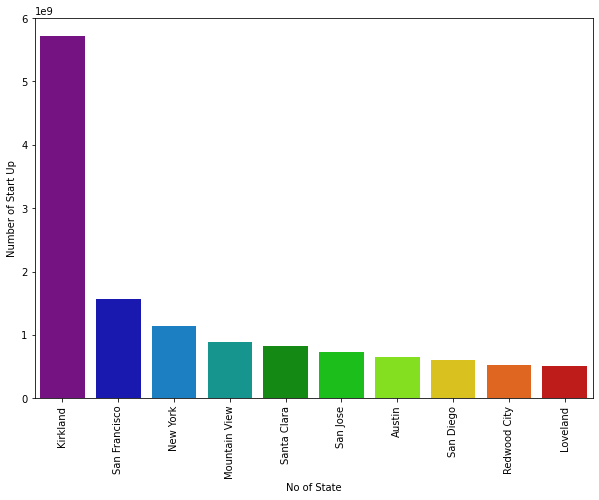

In [168]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="city", y="funding_total_usd", data=funding_sorted_city,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="No of State", ylabel="Number of Start Up")

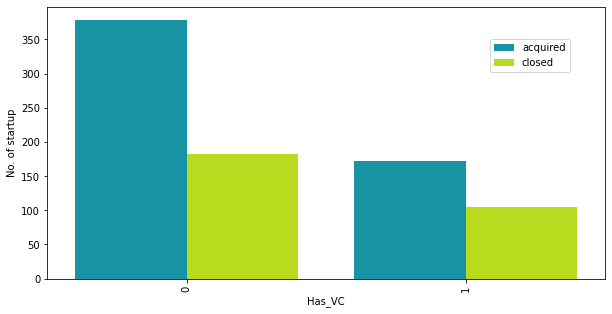

In [169]:
#How many Startup have has_VC?
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

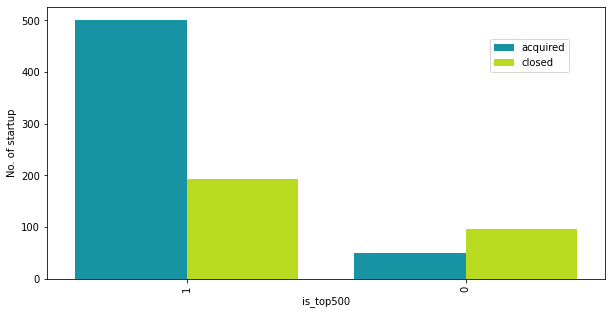

In [170]:
#How many Startup have is_top500?
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [171]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [172]:
df_closed['age_closed_startup'].head()

4     792 days
5    2602 days
12   3039 days
15   4104 days
16   3552 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [173]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

In [174]:
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,avg_participants,is_top500,status,last_date,age,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1.0,1,closed,2012-10-01,2.0,0.000000,0.031746,0.000226,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,3.0,1,closed,2009-02-15,7.0,0.207582,0.047619,0.001314,2602 days,7.128767
12,531,KY,38.241467,-85.724511,40204,c:30290,Louisville,Louisville KY 40204,Resonant Vibes,0,...,1.0,0,closed,2012-04-27,8.0,0.223973,0.000000,0.000059,3039 days,8.326027


In [175]:
(df_closed['age_closed_startup'].mean()) 

Timedelta('2299 days 16:58:32.195121952')

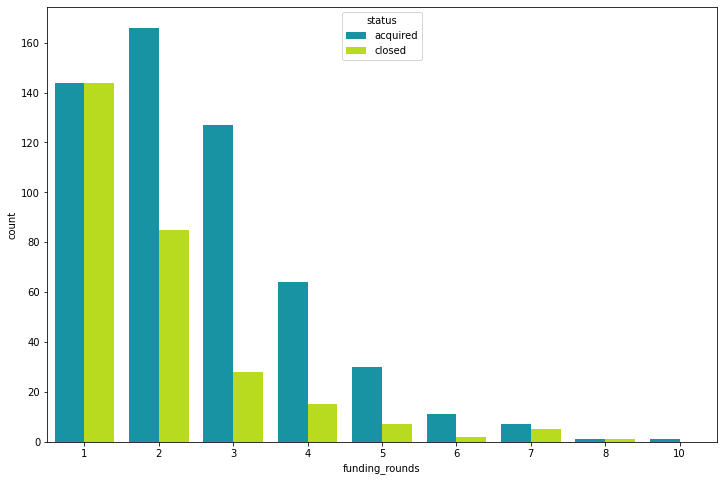

In [176]:
#which funding_rounds related to acquired or closed startup?
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)


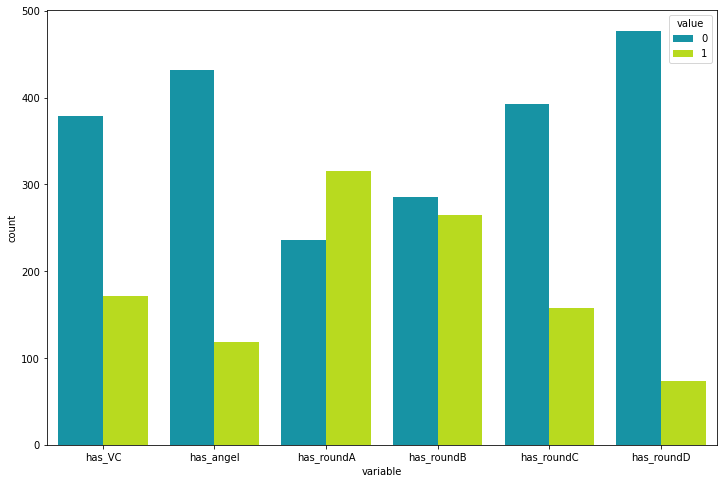

In [177]:
coba = df[(df["status"] == "acquired")]

features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

# Data Processing

In [178]:
#Duplicate Values
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


In [179]:
#Negative value
age1=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age1)):
    print("Is there any negative value in '{}' column  : {} ".format(age1[a],(df[age1[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


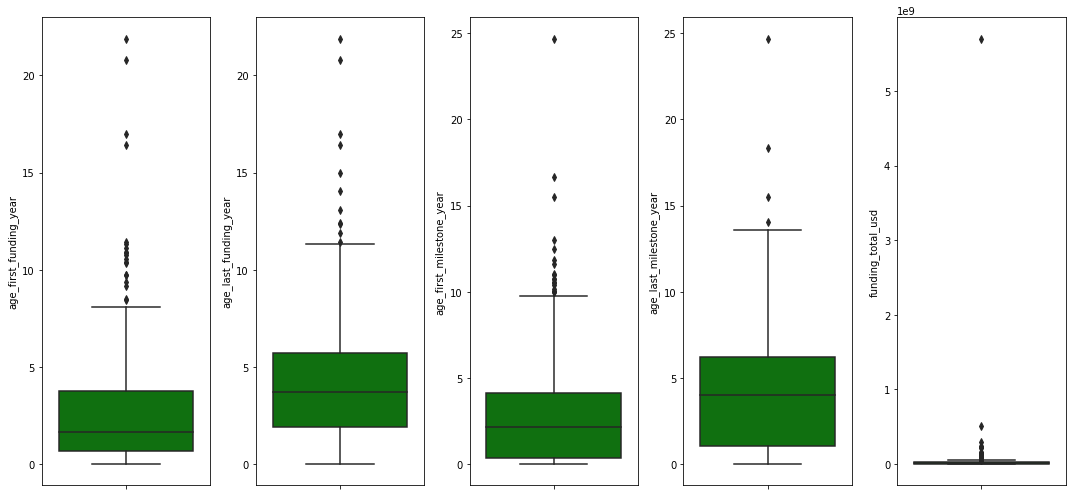

In [180]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [181]:
#Log-transformation of the funding and milestone year variable
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

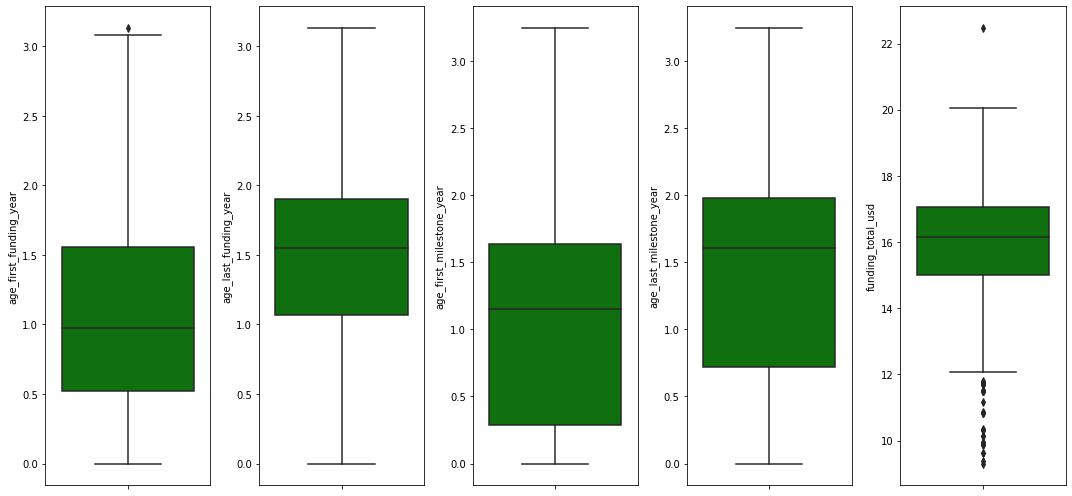

In [182]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [183]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,0,0,1.0000,0,acquired,2013-12-31,7.0,0.102727,0.047619,0.000064
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,1,1,4.7500,1,acquired,2013-12-31,14.0,0.234108,0.142857,0.007033
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,4.0000,1,acquired,2013-12-31,5.0,0.047173,0.079365,0.000454
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,1,1,3.3333,1,acquired,2013-12-31,12.0,0.143018,0.079365,0.007016
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,0,0,1.0000,1,closed,2012-10-01,2.0,0.000000,0.031746,0.000226


# Modeling

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
# Split Feature Vector and Label
X = df[['norm_relationships', 'norm_age_first_funding_year','norm_funding_total_usd',
          
          'age_last_funding_year',
          'age_first_milestone_year', 'age_last_milestone_year', 
          'funding_rounds', 'milestones','age',

          'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
          'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 
          'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 
          'has_VC', 'has_angel', 'has_roundA','has_roundB', 'has_roundC', 'has_roundD', 
          'avg_participants','is_top500'
          ]]

y = df['labels'] # target / label

#Splitting the data into Train and Test
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)


In [186]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling, over_sampling

In [187]:
# Oversampling
X_train, y_train = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

In [188]:
X_train.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.380952,0.000000,0.004720,2.014716,0.290428,2.398640,3,3,14.0,1,...,0,0,0,0,1,1,1,0,6.0,1
1,0.047619,0.030654,0.000016,0.513542,0.000000,0.563152,1,2,2.0,1,...,0,0,0,1,0,0,0,0,1.0,0
2,0.031746,0.047297,0.000182,1.146736,0.948099,0.948099,2,1,4.0,0,...,0,0,1,0,0,0,0,0,1.0,0
3,0.063492,0.473349,0.003682,2.430486,1.922554,1.922554,1,1,13.0,0,...,0,1,1,0,0,0,0,0,5.0,1
4,0.412698,0.248375,0.006314,2.004071,1.946696,1.946696,2,1,14.0,0,...,0,0,1,0,0,0,0,1,3.5,1


In [189]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'funding_rounds', 'milestones', 'age', 'avg_participants']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [190]:
X_train.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.380952,0.000000,0.004720,0.643482,0.089475,0.738975,0.222222,0.375,0.500000,1,...,0,0,0,0,1,1,1,0,0.333333,1
1,0.047619,0.030654,0.000016,0.164021,0.000000,0.173496,0.000000,0.250,0.071429,1,...,0,0,0,1,0,0,0,0,0.000000,0
2,0.031746,0.047297,0.000182,0.366257,0.292091,0.292091,0.111111,0.125,0.142857,0,...,0,0,1,0,0,0,0,0,0.000000,0
3,0.063492,0.473349,0.003682,0.776275,0.592302,0.592302,0.000000,0.125,0.464286,0,...,0,1,1,0,0,0,0,0,0.266667,1
4,0.412698,0.248375,0.006314,0.640082,0.599739,0.599739,0.111111,0.125,0.500000,0,...,0,0,1,0,0,0,0,1,0.166667,1


In [191]:
X_test.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
226,0.015873,0.193570,0.008770,0.528917,0.000000,0.000000,0.000000,0.000,0.392857,1,...,0,0,0,0,0,0,0,1,0.333333,1
909,0.412698,0.038039,0.009647,0.509990,0.462156,0.665265,0.333333,0.625,0.321429,1,...,0,0,0,0,1,1,1,1,0.116667,1
87,0.031746,0.360236,0.007489,0.784636,0.106661,0.106661,0.222222,0.125,0.428571,0,...,0,1,1,0,0,1,0,0,0.177780,1
74,0.015873,0.082458,0.000524,0.329478,0.000000,0.000000,0.000000,0.000,0.071429,0,...,0,0,0,0,1,0,0,0,0.000000,1
745,0.190476,0.080453,0.000617,0.383835,0.193941,0.429194,0.111111,0.375,0.178571,1,...,0,0,1,0,1,0,0,0,0.000000,0


# Feature Selection

In [192]:

df.dtypes

Unnamed: 0                              int64
state_code                             object
latitude                              float64
longitude                             float64
zip_code                               object
id                                     object
city                                   object
Unnamed: 6                             object
name                                   object
labels                                  int64
founded_at                     datetime64[ns]
closed_at                      datetime64[ns]
first_funding_at                       object
last_funding_at                        object
age_first_funding_year                float64
age_last_funding_year                 float64
age_first_milestone_year              float64
age_last_milestone_year               float64
relationships                           int64
funding_rounds                          int64
funding_total_usd                     float64
milestones                        

In [193]:
X_train.dtypes

norm_relationships             float64
norm_age_first_funding_year    float64
norm_funding_total_usd         float64
age_last_funding_year          float64
age_first_milestone_year       float64
age_last_milestone_year        float64
funding_rounds                 float64
milestones                     float64
age                            float64
is_CA                            int64
is_NY                            int64
is_MA                            int64
is_TX                            int64
is_otherstate                    int64
is_software                      int64
is_web                           int64
is_mobile                        int64
is_enterprise                    int64
is_advertising                   int64
is_gamesvideo                    int64
is_ecommerce                     int64
is_biotech                       int64
is_consulting                    int64
is_othercategory                 int64
has_VC                           int64
has_angel                

In [199]:
from sklearn.metrics import plot_confusion_matrix

# Logistic Regression

Training Accuracy : 0.768170426065163
Testing Accuracy : 0.8373015873015873


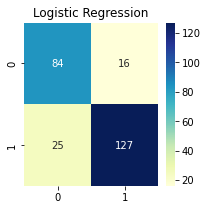

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.89      0.84      0.86       152

    accuracy                           0.84       252
   macro avg       0.83      0.84      0.83       252
weighted avg       0.84      0.84      0.84       252



In [202]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0).fit(X_train, y_train)

LR.score(X_train, y_train)

y_pred_LR = LR.predict(X_test)

print("Training Accuracy :", LR.score(X_train, y_train))
print("Testing Accuracy :", LR.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_LR)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('Logistic Regression')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_LR)
print(cr)


# SVM

Training Accuracy : 0.8508771929824561
Testing Accuracy : 0.7619047619047619


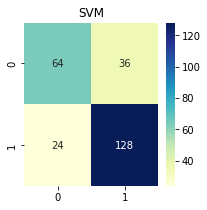

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       100
           1       0.78      0.84      0.81       152

    accuracy                           0.76       252
   macro avg       0.75      0.74      0.75       252
weighted avg       0.76      0.76      0.76       252



In [203]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_predicted_svm = svm.predict(X_test)

print("Training Accuracy :", svm.score(X_train, y_train))
print("Testing Accuracy :", svm.score(X_test, y_test))


cm = confusion_matrix(y_test, y_predicted_svm)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('SVM')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_svm)
print(cr)

# XGBoost Classifier

Training Accuracy : 0.9486215538847118
Testing Accuracy : 0.8492063492063492


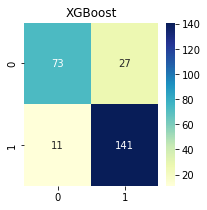

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       100
           1       0.84      0.93      0.88       152

    accuracy                           0.85       252
   macro avg       0.85      0.83      0.84       252
weighted avg       0.85      0.85      0.85       252



In [204]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
plt.title('XGBoost')
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)

print(cr)